# TP2 - Spatial Filtering
ATRIM - Option Datasim

Ecole Centrale Nantes

Diana Mateus

**Participants:** Yassine Jamoud, Samy Haffoudhi

# GOAL

In this lab we will practice the general principles of spatial filtering. Starting from a mean kernel filter we will build up to create and apply Gaussian and derivative filters. Then, we will break the some of the assumptions of linear filtering, when creating a bilinear filtering and looking for Waldo (Charlie)


# 0. Preparation

* Handling several images can create large memory demands. In order to avoid large size files reuse the image variable names or clear large variables with the command

example: ```reset_selective name_variable```

* Submit the jupyter notebook empty. To do so, go to the Kernel menu, restart and clear output. 

* Use always the relative given path for the images

* If you get some warnings "IOPub data rate exceeded" lauch your notebook with

```jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000```

* Resize the images for debugging to accelerate the process

### 0.1 Importing the required modules


In [4]:
import skimage.io as io
from skimage.transform import resize, rescale
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os

### 0.2 Define the main image folder
Make sure the subsequent parts of this notebook refer to this definition IMDIR. **When evaluating your notebook I should only need to change the path here** to run the entire notebook and find all the images

In [5]:
IMDIR = "./images/"

# 1. Smoothing 

### 1.0 Mean Kernel

The following ``meanKernel'' function creates an smoothing kernel, which can be used with scipy's 
```python
ndimage.convolve(im,kernel)
```
convolution function to blur an image.



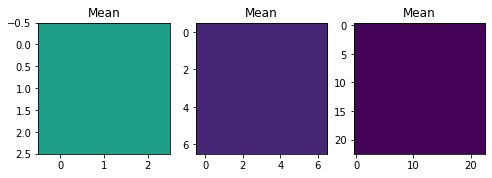

In [6]:
def meanKernel(hs):
    kernel = np.zeros((hs*2+1,hs*2+1))
    kernel += 1/(hs*2+1)**2
    return kernel

width=8
height=3
plt.rcParams['figure.figsize'] = [width, height]

#creating and showing three mean kernels of different sizes
k = 1
for hs in [1,3,11]:
    plt.subplot(1,3,k)
    kernel = meanKernel(hs)
    plt.imshow(kernel, vmin=0, vmax=0.2)
    plt.title('Mean')
    k+=1
plt.show()

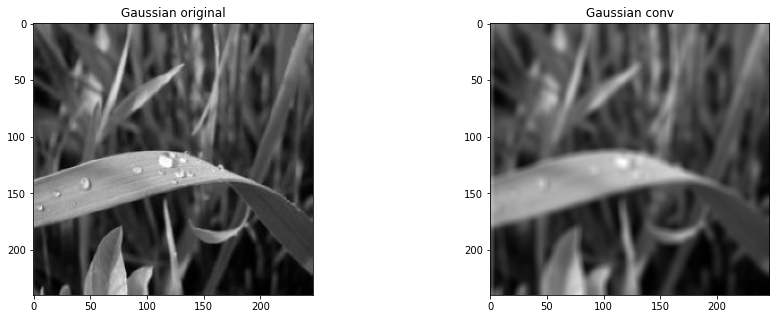

In [7]:
SUBDIR = os.path.join(IMDIR, "smooth")
f = os.path.join(SUBDIR, "grass.jpg")

width=15
height=5

hs = 3

im = io.imread(f, as_gray=True)
im = im.astype(float)
kernel = meanKernel(hs)
im_filtered = ndimage.convolve(im,kernel)
# im_filtered = myConvolve(im,kernel)

fig=plt.figure(figsize=(width, height))
plt.subplot(1,2,1)        
plt.imshow(im, cmap = 'gray')
plt.title('Gaussian original')
        
plt.subplot(1,2,2)
plt.imshow(im_filtered, cmap = 'gray')
plt.title('Gaussian conv')
            
plt.show()

### 1.1. Gaussian Kernel
Following the above example, create a function that receives the required parameters of a Gaussian kernel (window halfsize and standard deviation) and gives as output a Gaussian kernel matrix. Display 3 instances of the kernel with different parameters.  

```Hints```:
- Show that kernel elements sum up to 1.
- You may want to use functions ```np.arange```, ```np.linspace``` and/or ```np.meshgrid``` for creating the regular grid onto which to compute the Gaussian filter weights.
- use the 'None' or 'Nearest' interpolation options of imshow to display the kernel images

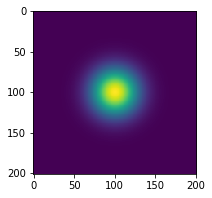

In [8]:
def gaussianKernel(hs,sig):
    u= np.linspace(-hs,hs,2*hs+1);
    v= np.linspace(-hs,hs,2*hs+1);
    uu,vv =np.meshgrid(u,v);  
    kernel=(1/(2*np.pi*sig**2))*np.exp(-(uu**2+vv**2)/(2*sig**2));
    kernel/=np.sum(kernel);
    plt.imshow(kernel, interpolation='Nearest');
    return kernel

kernel = gaussianKernel(100,20);

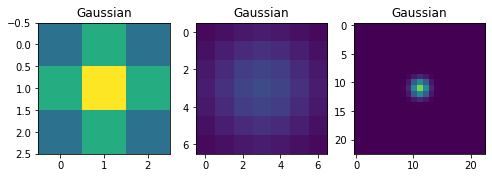

In [9]:
width=8
height=3
plt.rcParams['figure.figsize'] = [width, height]

#creating and showing three mean kernels of different sizes
k = 1
for hs, sig in [(1, 1),(3, 2), (11, 1)]:
    plt.subplot(1,3,k)
    kernel = gaussianKernel(hs, sig)
    plt.imshow(kernel, vmin=0, vmax=0.2)
    plt.title('Gaussian')
    k+=1
    
plt.show()

### 1.2 Smoothing for reducing aliasing

Apply the ```Gaussian``` filter from the previous exercise to 1 image from the ```smooth``` folder. 

Use the scipy convolution function
```python
ndimage.convolve(im,kernel)
```

```Hint```: Convert the images to grayscale before filtering. you can use your own ```rgb2gray``` function or read the images with the ```io.imread``` function with mode ```as_gray=True```. 

For the chosen image demonstrate the interest of smoothing prior to subsampling to reduce aliasing (show results for 3 sampling rates: 1/2, 1/4, 1/8). Comment on the how to choose the appropriate kernel sizes in each case




In [ ]:
SUBDIR = os.path.join(IMDIR, "smooth")
f = os.path.join(SUBDIR, "grass.jpg")

width=15
height=5

hs = 3
sigma = 0.5

im = io.imread(f, as_gray=True)
im = im.astype(float)
im = resize(im,(100,100))    
kernel = gaussianKernel(hs,sigma)
im_filtered_scipy = ndimage.convolve(im,kernel)

fig=plt.figure(figsize=(width, height))

plt.subplot(1,2,1)        
plt.imshow(im, cmap = 'gray')
plt.title('Gaussian original')
                
plt.subplot(1,2,2)
plt.imshow(im_filtered_scipy, cmap = 'gray')
plt.title('Gaussian scipy conv')

plt.show()

In [ ]:
def subsampling(im,factor):
    im_sub=im[::factor,::factor]
    return im_sub

In [ ]:
hs = 3
sigma = 2

im = io.imread(f, as_gray=True)
im = im.astype(float)
im = resize(im,(100,100))   

kernel = gaussianKernel(hs,sigma)
im_filtered_scipy = ndimage.convolve(im,kernel)

fig=plt.figure(figsize=(width, height))

plt.subplot(2,4,1)        
plt.imshow(im, cmap = 'gray')
plt.title('Image original size')

plt.subplot(2,4,2)        
plt.imshow(subsampling(im,2), cmap = 'gray')
plt.title('Image original resize 1/2')

plt.subplot(2,4,3)        
plt.imshow(subsampling(im,4), cmap = 'gray')
plt.title('Image original resize 1/4')

plt.subplot(2,4,4)        
plt.imshow(subsampling(im,8), cmap = 'gray')
plt.title('Image original resize 1/8')

plt.subplot(2,4,5)        
plt.imshow(im_filtered_scipy, cmap = 'gray')
plt.title('Gaussian original')

plt.subplot(2,4,6)        
plt.imshow(subsampling(im_filtered_scipy,2), cmap = 'gray')
plt.title('Gaussian resize 1/2')

plt.subplot(2,4,7)        
plt.imshow(subsampling(im_filtered_scipy,4), cmap = 'gray')
plt.title('Gaussian resize 1/4')

plt.subplot(2,4,8)        
plt.imshow(subsampling(im_filtered_scipy,8), cmap = 'gray')
plt.title('Gaussian resize 1/8')

plt.tight_layout()       

### 1.3 Filtering with your own Convolution
**a)** Repeat the smoothing above with your own implementation of the ```convolution``` function. The function should receive as input an image and a filter kernel (matrix of weights) and return the filtered image. Compare your results with those from the scikit in-built function.

**b)** Apply to 3  images from the ``smooth`` folder a Gaussian filter with fixed parameters and display side by side your results vs. those of the in-built function to check your implementation is correct. Clearly state on the title of the image which version of the convolution function is being used.

```Hint```: you may implement the convolution with or without loops or writing the convolution as a matrix multiplication (see http://cs231n.github.io/convolutional-networks/)

**c)** **Write down your findings**, notably the reasons for any possible difference with the in-built implementation. 

**d)** Why and how can the convolution can be written as a matrix multiplication?

In [ ]:
def myConvolution(im,kernel):
    im_ref=im.copy
    hs=int((kernel.shape[1]-1)/2)
    x,y=im.shape;
    im_filtered=np.zeros((x,y));
    im_ref=np.pad(im,hs)
    for i in range(x):
        for j in range(y):
            im_filtered[i,j]=0
            for u in range(-hs,hs):
                for v in range(-hs,hs):
                    im_filtered[i,j]+= (kernel[u+hs,v+hs]*im_ref[i+hs-u,j+hs-v])
    return im_filtered

In [ ]:
SUBDIR = os.path.join(IMDIR, "smooth")
f = os.path.join(SUBDIR, "grass.jpg")

width=20
height=20

hs = 3
sigma = 2

im = io.imread(f, as_gray=True)
im = im.astype(float)
im = resize(im,(100,100))   

kernel = gaussianKernel(hs,sigma)
im_filtered_scipy = ndimage.convolve(im,kernel)

fig=plt.figure(figsize=(width, height))

im_filtered=myConvolution(im,kernel)

plt.subplot(1,4,1)
plt.imshow(im, cmap = 'gray')
plt.title('Original')

plt.subplot(1,4,2)
plt.imshow(im_filtered, cmap = 'gray')
plt.title('Gaussian own conv')

plt.subplot(1,4,3)
plt.imshow(im_filtered_scipy, cmap = 'gray')
plt.title('Gaussian scipy conv')

plt.subplot(1,4,4)
plt.imshow(im_filtered_scipy-im_filtered, cmap = 'gray')
plt.title('Gaussian Difference')

On remarque les différences suivantes entre les 2 fonctions de convolution :

* Notre implémentation a recourt à du zero padding mais par défaut la fonction built-in utilise un padding mirroir
* La fonction python est mieux implementer que la notre, il n'y a pas d'effet de bords
* python optimise mieux les calculs
* En effet la convolution peut être implementée sous forme d'un calcul matriciel plutôt qu'une suite de for

## 2. Derivative filters

2.1 Create a function that generates the 3 kernels required to compute 
- the *image gradient* in the x and in the y direction, 
- the *image Laplacian* (the output should be 3 kernel matrices).

2.2 For each kernel, show the behaviour of using it to convolve  images from the ``gradient`` folder with each kernel from 2.1. Show the resultant gradients in each direction, the gradient magnitude, and the laplacian.

2.3. **Write down your remarks for each image**: (e.g. why are some edges visible and others not?, when is it useful to use a derivative filter, what are the limitations? etc...)

2.4 **Image enhancement**

Use one of the contour enhancing methods seen in the lecture (unsharp masking, highboost filtering or laplacian enhancement) to "sharpen" one of the images in the ``enhance`` folder. 



In [ ]:
def generateGradientKernel():
    kernel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
    return (kernel, kernel.T)

def generateLaplacianKernel():
    return np.array([[0,1,0], [1,-4,1], [0,1,0]])

def gradient_x(im):
    kernel, _ = generateGradientKernel()
    return ndimage.convolve(im, kernel)

def gradient_y(im):
    _, kernel = generateGradientKernel()
    return ndimage.convolve(im, kernel)

def gradient_norm(im):
    return np.sqrt(gradient_x(im)**2 + gradient_y(im)**2)

def laplacian(im):
    kernel = generateLaplacianKernel()
    return  ndimage.convolve(im, kernel)

width=20
height=20
plt.rcParams['figure.figsize'] = [width, height]
            
fig=plt.figure()

SUBDIR = os.path.join(IMDIR, "enhance")

im_counter = 1
for root, dirnames, filenames in os.walk(SUBDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            im = io.imread(f,as_gray=True)
            im = resize(im,(100,100),mode='constant')
                
            plt.subplot(8,5,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            
            plt.subplot(8,5, im_counter+1)
            plt.imshow(gradient_x(im), cmap='gray')
            plt.title('gradient_x')
            plt.axis('off')
            
            plt.subplot(8,5, im_counter+2)
            plt.imshow(gradient_y(im), cmap='gray')
            plt.title('gradient_y')
            plt.axis('off')
            
            plt.subplot(8,5, im_counter+3)
            plt.imshow(gradient_norm(im), cmap='gray')
            plt.title('gradient_norm')
            plt.axis('off')
            
            plt.subplot(8,5, im_counter+4)
            plt.imshow(laplacian(im), cmap='gray')
            plt.title('laplacian')
            plt.axis('off')           
            
            im_counter += 5 

plt.show()

Remarques :

* pour chaque image, les images obtenues par le calcul de norme du gradient et du laplacian sont similaires et approximent le contour de l'image originale
* les composantes du gradient permettent d'observer la vitesse de changement de couleurs dans l'image selon les axes x et y
* comme on peut le voir pour l'image `moon-blurred` par exemple, le gradient est assez sensible aux détails de l'image


In [ ]:
def laplacianEnhance(im,c):
    kernelL =generateLaplacianKernel()
    laplaceImg=ndimage.convolve(im,kernelL)
    im_sharp = im+c*laplaceImg
    return im_sharp

In [ ]:
def scale(im):
    return 255 / (np.max(im) - np.min(im)) * (im - np.min(im))

SUBDIR = os.path.join(IMDIR, "enhance")
f = os.path.join(SUBDIR, "moon-blurred.tif")

width=20
height=20

hs = 3
sigma = 2

im = io.imread(f, as_gray=True)
im = im.astype(float)
#im = resize(im,(100,100))

im_enhance=laplacianEnhance(im,-1)
im_enhance_normalized = (im_enhance-np.min(im_enhance))*((np.max(im)-np.min(im))/(np.max(im_enhance)-np.min(im_enhance)))

plt.subplot(1,3,1)
plt.imshow(im, cmap = 'gray')
plt.title('Original image')

plt.subplot(1,3,2)
plt.imshow(im_enhance, cmap = 'gray')
plt.title('Enhanced image')

plt.subplot(1,3,3)
plt.imshow(im_enhance_normalized, cmap = 'gray')
plt.title('Enhanced image normalized')

plt.show()

## 3. Bilateral Filter

Implement your own version of the ``bilateral`` filter and compare its results vs. scikit ``denoise_bilateral`` function. Show results one image for the ``denoising `` folder for different values of the spatial and color kernels, and for different iterations

__BONUS__: Combine iterative bilateral filter with unsharp masking to create rotorized-like images. See an example from the ``cartoonize`` folder such as the ones used in "Scanner Darkly", "Undonne", and others)

In [ ]:
def compute_kernel_depend(im_ref,i,j,u,v,sig2,hs):
    kernel = np.zeros((2*hs+1,2*hs+1));
    for u in range(-hs,hs):
        for v in range(-hs,hs):
            kernel[u,v] = (1/(2*np.pi*sig2**2))*np.exp(-1*(im_ref[i+u,j+v]-im_ref[i,j])**2/(2*sig2**2))
    return kernel

In [ ]:
def bilateral(im, hs, sig1, sig2):
    im_ref=im.copy
    x,y=im.shape;
    im_filtered=np.zeros((x,y));
    im_ref=np.pad(im,hs)
    kernel_gauss = gaussianKernel(hs,sig1)
    for i in range(x):
        for j in range(y):
            im_filtered[i,j]=0
            for u in range(-hs,hs):
                for v in range(-hs,hs):
                    kernel_content= compute_kernel_depend(im_ref,i,j,u,v,sig2,hs)
                    kernel_content/=np.sum(kernel_content);
                    kernel = kernel_gauss*kernel_content
                    im_filtered[i,j]+= (kernel[u+hs,v+hs]*im_ref[i+hs-u,j+hs-v])
    return im_filtered

In [ ]:
from skimage.restoration import denoise_bilateral

width=50
height=50


SUBDIR = os.path.join(IMDIR, "denoise")
f = os.path.join(SUBDIR, "taj.jpg")

im = io.imread(f, as_gray=True)
im = im.astype(float)
fig=plt.figure(figsize=(width, height))
im = resize(im,(100,100))

my_im_denoised = bilateral(im,3,0.05,15)
im_denoised = denoise_bilateral(im, sigma_color=0.05, sigma_spatial=15)

plt.subplot(1,3,1)
plt.imshow(im, cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(im_denoised, cmap='gray')
plt.title('denoise scikit')
plt.subplot(1,3,3)
plt.imshow(my_im_denoised, cmap='gray')
plt.title('homemade bilateral')

plt.show()

## 4. Find Waldo (Charlie): template matching

Use patch-wise Normalized Cross Correlation (NCC) to automatically find Waldo (Charlie) in an image. To this end, look for the template image (``charlie-template``) inside ``marche-crop`` or the ``marche`` images. As the process can be long start with the cropped version, you might also find it useful to create a separate notebook for this task only. Evaluate the NCC expression from the slides (non-local means) to compare the template with every location in the target image, store the results and retrieve the location with the highest NCC score. Draw this location on the target image.

**Describe the process assumptions and limitations**

In [ ]:
import matplotlib.patches as patches

SUBDIR = os.path.join(IMDIR, "charlie")
f1 = os.path.join(SUBDIR, "marche-crop.png")
f2 = os.path.join(SUBDIR, "charlie-template.jpeg")

im = io.imread(f1, as_gray=True)
template = io.imread(f2, as_gray=True)
# on rescale l'image pour reduire les calculs
im = rescale(im, 0.3)
template = rescale(template, 0.3)

def findTemplate(im, template):
    h_target, w_target = im.shape
    h_template, w_template = template.shape
    
    max_ncc = 0
    template_mean = np.sum(template) / (h_template * w_template)
    for u in range(h_target - h_template):
        for v in range(w_target - w_template):
            im_mean = sum(im[u:u+h_template, v+w_template]) / (h_template * w_template)
                        
            num = den_1 = den_2 = 0
            for i in range(h_template):
                for j in range(w_template):
                    num += (im[u+i, v+j] - im_mean) * (template[i, j] - template_mean)
                    den_1 += (im[u+i, v+j] - im_mean) ** 2
                    den_2 += (template[i, j] - template_mean) ** 2
            
            ncc = num / np.sqrt(den_1 * den_2)
            
            if ncc > max_ncc:
                res = (v, u)
                max_ncc = ncc
                
    return res

pos = findTemplate(im, template)

fig, ax = plt.subplots()
ax.imshow(im, cmap='gray')
rect = patches.Rectangle(pos, template.shape[1], template.shape[0], linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.axis('off')
plt.show()

On remarque que :

* Cette méthode necessite que la taille du template soit égale à celle du motif recherché dans l'image
* Le temps de calcul est très important étant donné une complexité en O(taille du template x taille de l'image)
* Cette méthode fonctionne uniquement pour les images en niveaux de gris